# Student Performance Prediction

### Parameters considered in dataset:
##### Hours_Studied: Weekly study hours by the student.
##### Attendance: Percentage of classes attended.
##### Parental_Involvement: Level of parental engagement in academic activities (Low, Medium, High).
##### Access_to_Resources: Availability of academic resources at home (Low, Medium, High).
##### Extracurricular_Activities: Participation in non-academic school activities (Yes, No).
##### Sleep_Hours: Average nightly sleep hours.
##### Previous_Scores: Score from a previous standardized exam.
##### Motivation_Level: Self-driven academic motivation level (Low, Medium, High).
##### Internet_Access: Whether the student has internet access at home (Yes, No).
##### Tutoring_Sessions: Number of tutoring sessions attended.
##### Family_Income: Socioeconomic status based on household income (Low, Medium, High).
##### Teacher_Quality: Overall instruction quality based on assessments (Low, Medium, High).
##### School_Type: Type of school attended (Public, Private).
##### Peer_Influence: Influence of peers on academic behavior (Negative, Neutral, Positive).
##### Physical_Activity: Weekly hours spent on physical activity.
##### Learning_Disabilities: Indicates if the student has a learning disability (Yes, No).
##### Parental_Education_Level: Highest education level attained by parents (High School, College, Postgraduate).
##### Distance_from_Home: Proximity of home to school (Near, Moderate, Far).
##### Gender: Gender of the student (Male, Female).
##### Exam_Score: Final exam score (target variable).


## Data Preparation

In [1]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading the dataset
df = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
# Displaying the shape of the dataset to understand the number of rows and columns
df.shape

(6607, 20)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
#statistical summary of the dataset 
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
# checking for null values in the dataset
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [8]:
# for the categorical columns, we will fill missing values with the mode
categorical_columns_with_missing = ['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']

for column in categorical_columns_with_missing:
    mode_value = df[column].mode()[0]  
    df[column].fillna(mode_value, inplace=True)
df.sample(5)


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
2455,29,94,Low,High,Yes,4,95,Medium,Yes,1,Medium,Medium,Public,Positive,5,No,High School,Near,Male,74
2602,16,94,Medium,Medium,Yes,8,76,Low,Yes,3,Medium,Medium,Public,Negative,4,No,Postgraduate,Near,Female,70
5708,15,88,Medium,Medium,Yes,7,85,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,Postgraduate,Near,Female,69
2852,13,67,Medium,High,Yes,6,88,Medium,Yes,0,Low,Medium,Public,Neutral,3,No,College,Moderate,Female,63
5412,15,99,Medium,Medium,Yes,5,71,Medium,Yes,0,Medium,Medium,Public,Neutral,2,No,College,Moderate,Male,68


In [9]:
#checking for duplicates in the dataset again
df.duplicated().sum()

np.int64(0)

In [10]:
# check for unique values in each column
df.nunique()

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64

In [11]:
# Identifying numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Detecting and fixing outliers using IQR
for column in numerical_columns:
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Capping the outliers
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

# Displaying a sample of the fixed dataset
df.sample(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
1792,19.0,76.0,Medium,Low,Yes,5.0,66.0,Medium,Yes,2.0,Medium,Medium,Private,Positive,4.0,No,College,Near,Female,66.0
6470,20.0,71.0,Low,High,Yes,6.0,63.0,High,Yes,1.0,Low,Medium,Public,Positive,2.0,No,College,Moderate,Male,65.0
5125,16.0,82.0,Medium,Medium,No,7.0,56.0,Low,Yes,0.0,High,High,Private,Negative,1.0,Yes,High School,Far,Female,75.0
2371,17.0,76.0,High,Medium,Yes,4.0,58.0,Medium,Yes,3.5,Medium,Medium,Private,Neutral,2.0,No,Postgraduate,Moderate,Female,67.0
4349,17.0,90.0,Medium,Medium,No,7.0,83.0,Low,Yes,3.5,Medium,High,Public,Negative,3.0,Yes,High School,Near,Male,68.0


## Data Visualization

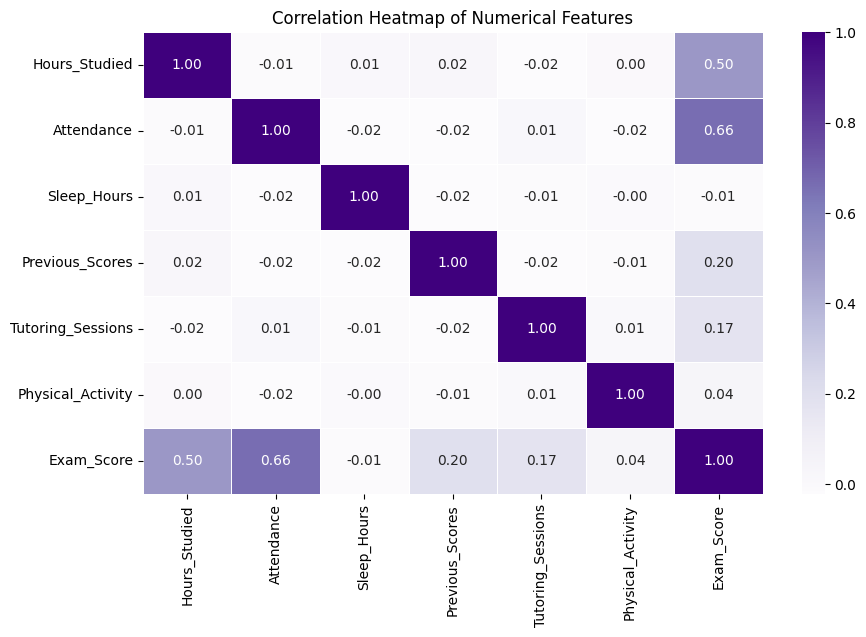

In [12]:
# Correlation Heatmap for numerical features

numerical_features = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

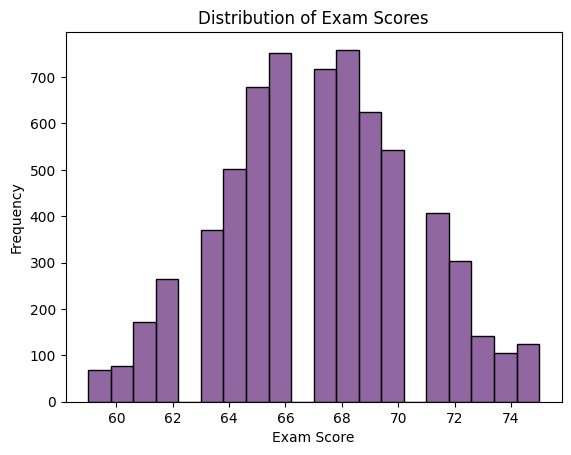

In [13]:
# Visualizing the distribution of Exam Scores
sns.histplot(data=df, x='Exam_Score', bins=20, color='#6c3483', kde=False)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()


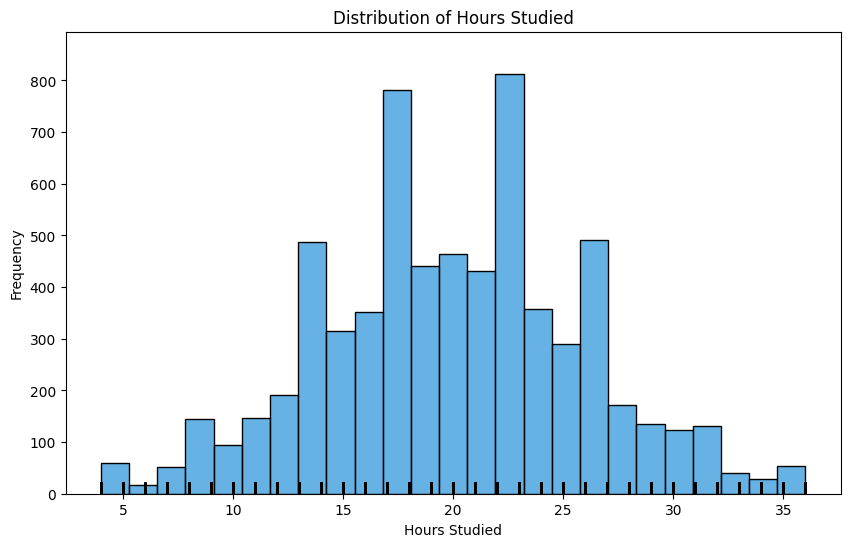

In [14]:
# Visualizing the distribution of Exam Scores
plt.figure(figsize=(10, 6))

# Histogram with 25 bins
sns.histplot(data=df, x='Hours_Studied', bins=25, color='#3498db', kde=False)

# Add rug plot (like marginal='rug' in Plotly)
sns.rugplot(data=df, x='Hours_Studied', color='black')

plt.title('Distribution of Hours Studied')
plt.xlabel('Hours Studied')
plt.ylabel('Frequency')
plt.show()


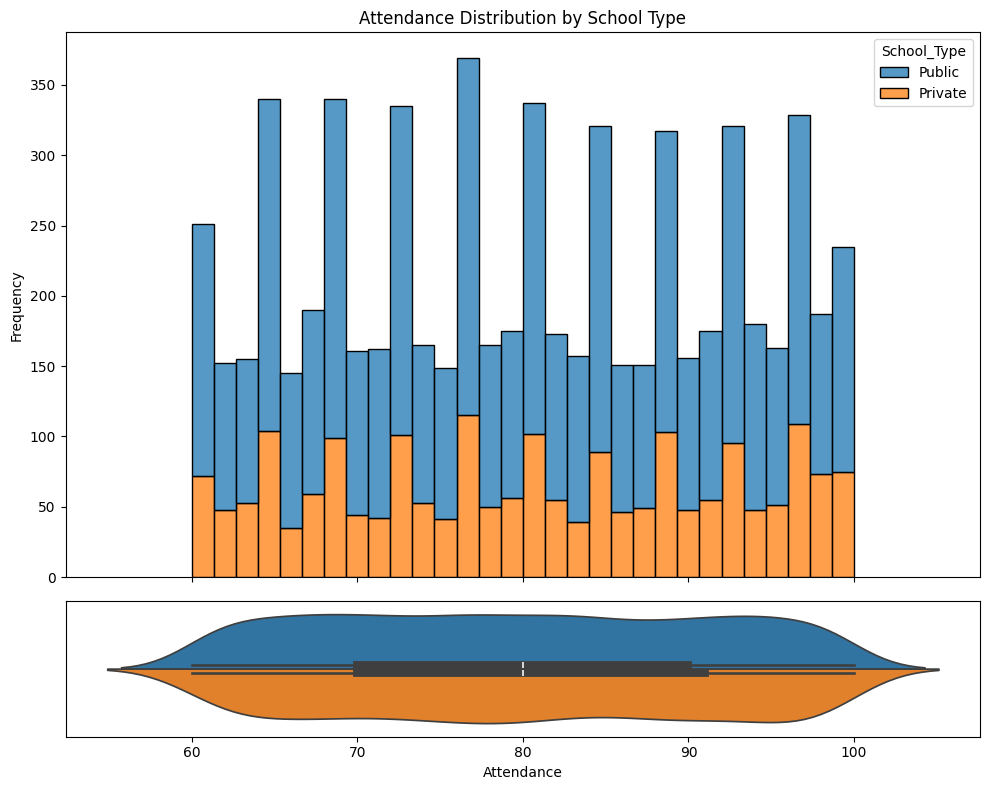

In [15]:
# Visualizing the distribution of Exam Scores
# Set the color palette to match your desired colors
custom_palette = ['#1f77b4', '#ff7f0e']
sns.set_palette(custom_palette)

# Set up the figure with two subplots: histogram and violin plot
fig, (ax_hist, ax_violin) = plt.subplots(
    2, 1, figsize=(10, 8), 
    gridspec_kw={'height_ratios': [4, 1]}, 
    sharex=True
)

# Histogram colored by School_Type
sns.histplot(
    data=df, 
    x='Attendance', 
    hue='School_Type', 
    bins=30, 
    multiple='stack', 
    ax=ax_hist
)

ax_hist.set_title('Attendance Distribution by School Type')
ax_hist.set_ylabel('Frequency')

# Violin plot below histogram
sns.violinplot(
    data=df, 
    x='Attendance', 
    hue='School_Type', 
    split=True, 
    ax=ax_violin, 
    palette=custom_palette
)

# Remove y-axis from violin for cleaner look
ax_violin.set_ylabel('')
ax_violin.set_yticks([])
ax_violin.set_xlabel('Attendance')

# Tidy up legend
ax_violin.legend_.remove()

plt.tight_layout()
plt.show()


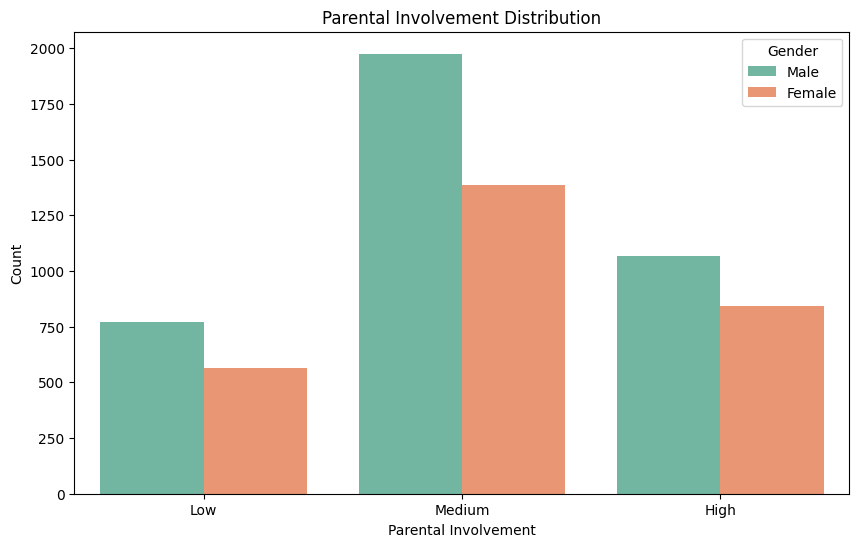

In [16]:
# Bar Plot for categorical features

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Parental_Involvement', hue='Gender', palette='Set2')
plt.title('Parental Involvement Distribution')
plt.xlabel('Parental Involvement')
plt.ylabel('Count')
plt.show()

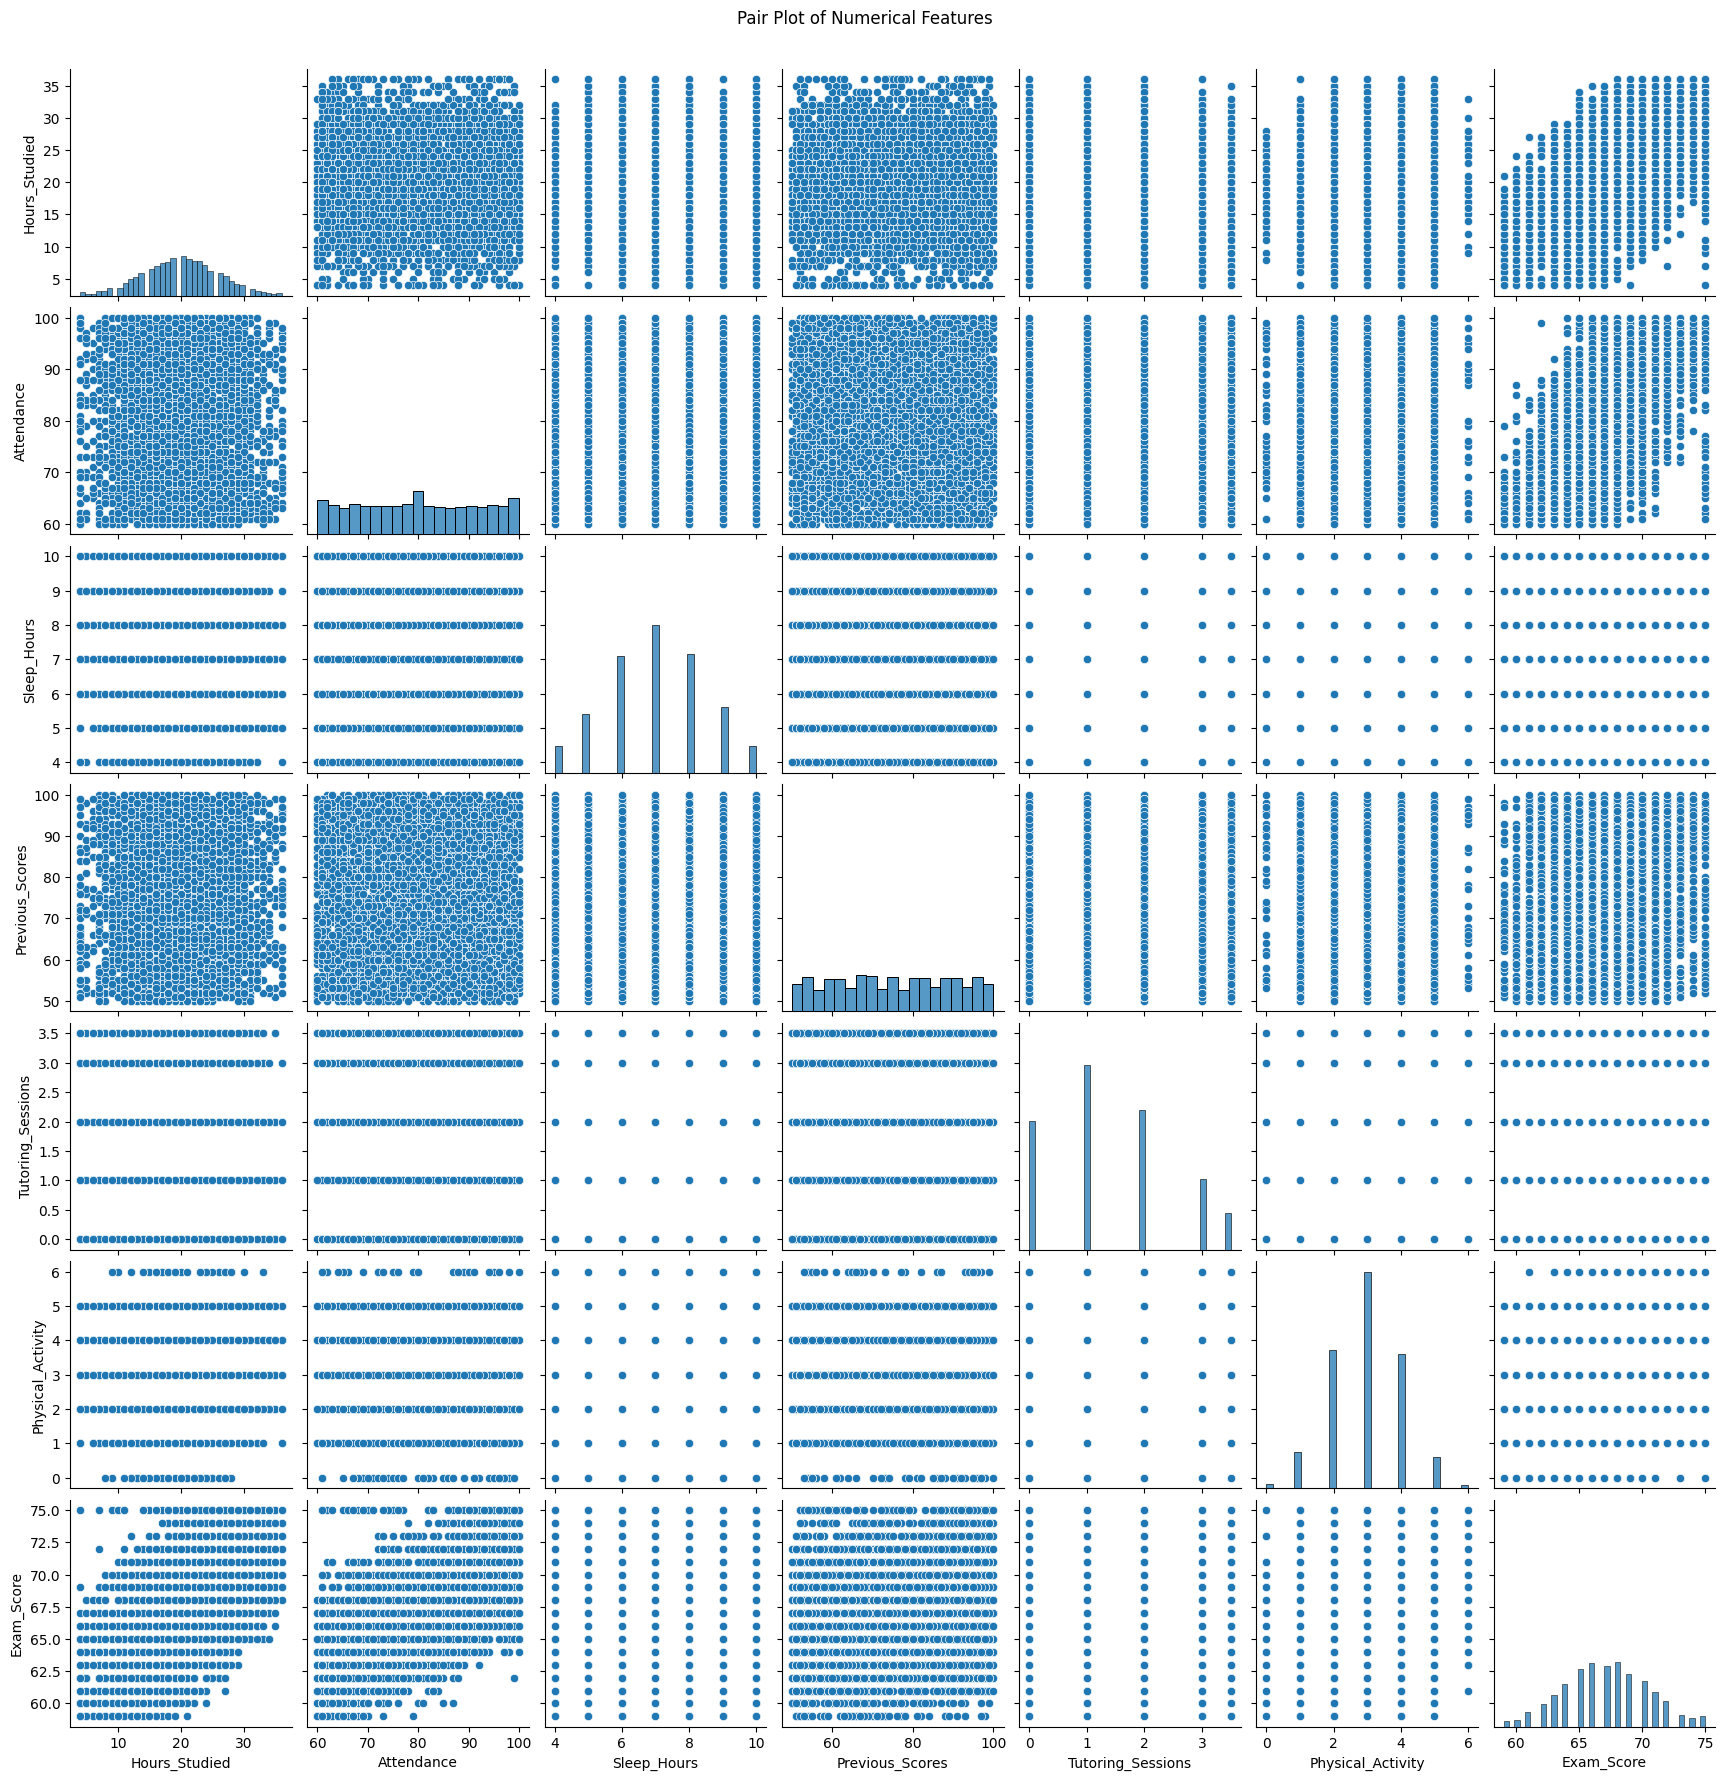

In [17]:
# Pair Plot for relationships between numerical variables

sns.pairplot(numerical_features)
plt.suptitle("Pair Plot of Numerical Features", y=1.02)
plt.show()

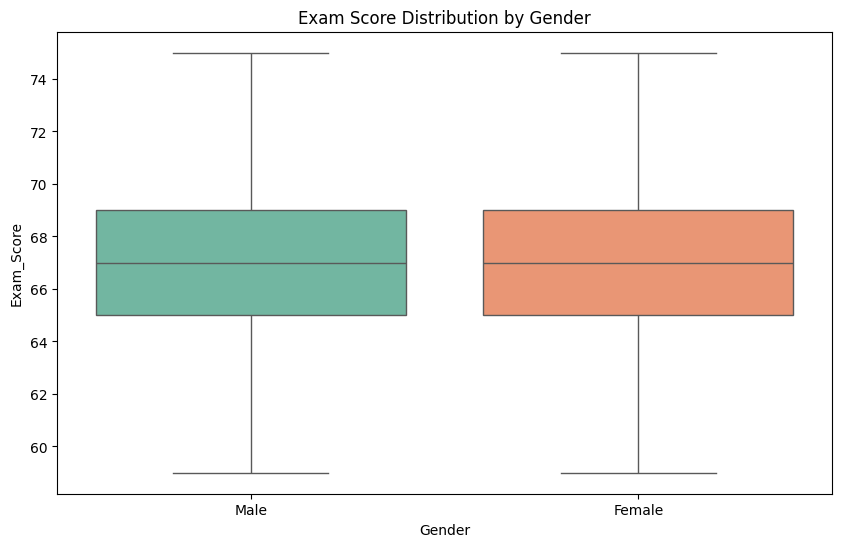

In [18]:
# Box Plot to compare Exam Score distribution across Gender

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='Set2')
plt.title('Exam Score Distribution by Gender')
plt.show()

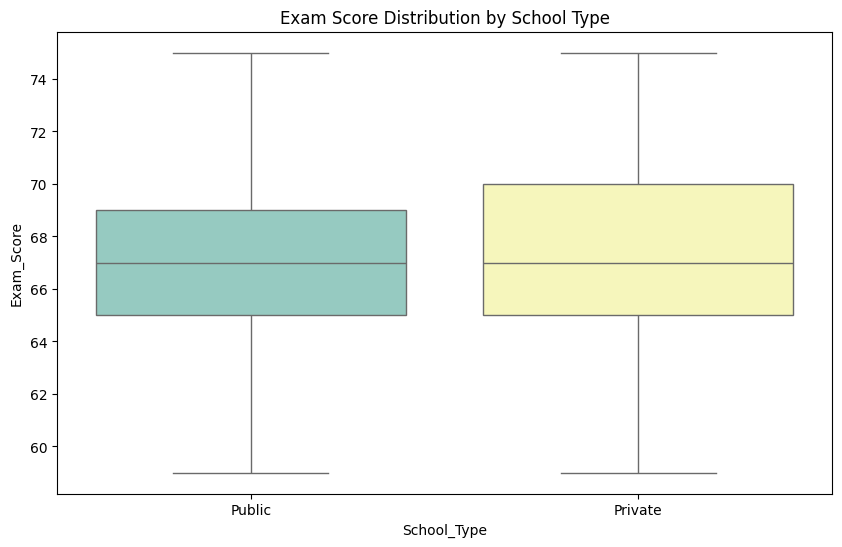

In [19]:
# Box Plot for Exam Scores Based on School Type

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='School_Type', y='Exam_Score', palette='Set3')
plt.title('Exam Score Distribution by School Type')
plt.show()

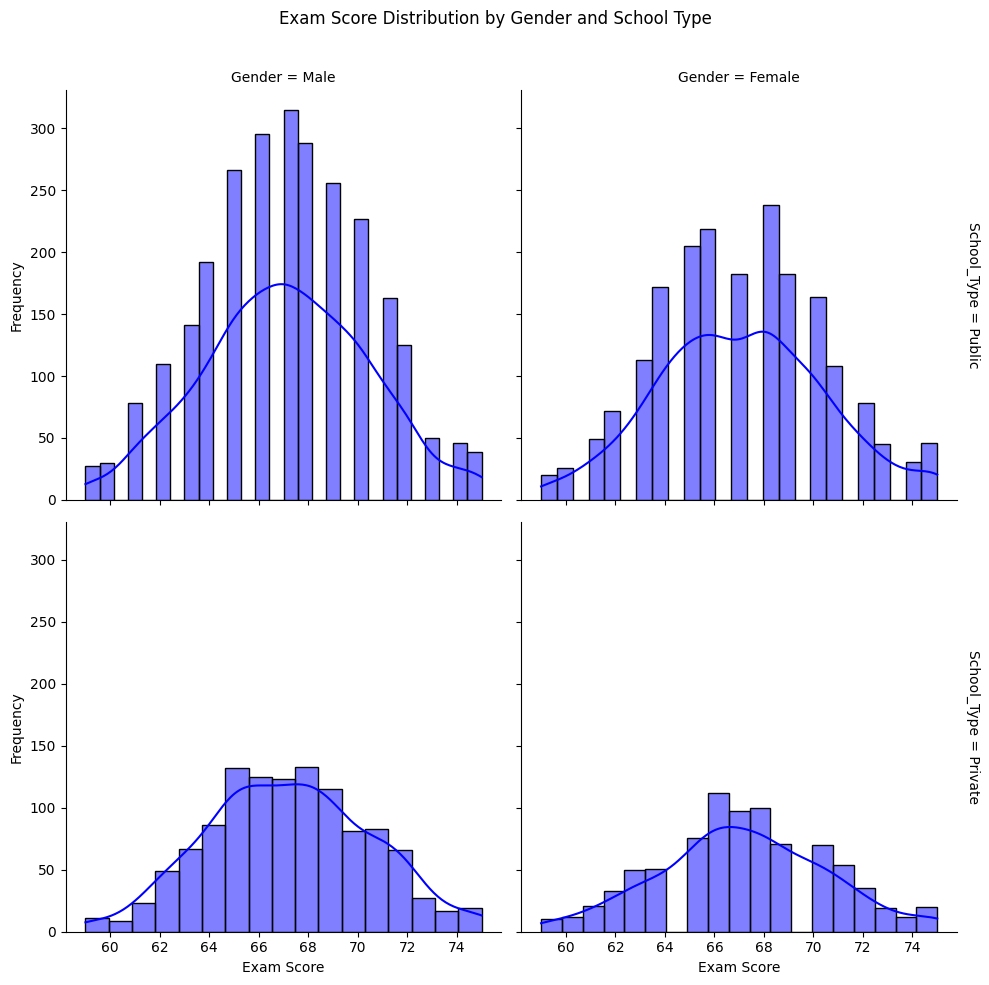

In [20]:
#  FacetGrid for Multiple Categorical Variables

g = sns.FacetGrid(df, col="Gender", row="School_Type", margin_titles=True, height=5)
g.map(sns.histplot, "Exam_Score", kde=True, color="blue")
g.set_axis_labels('Exam Score', 'Frequency')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Exam Score Distribution by Gender and School Type')
plt.show()


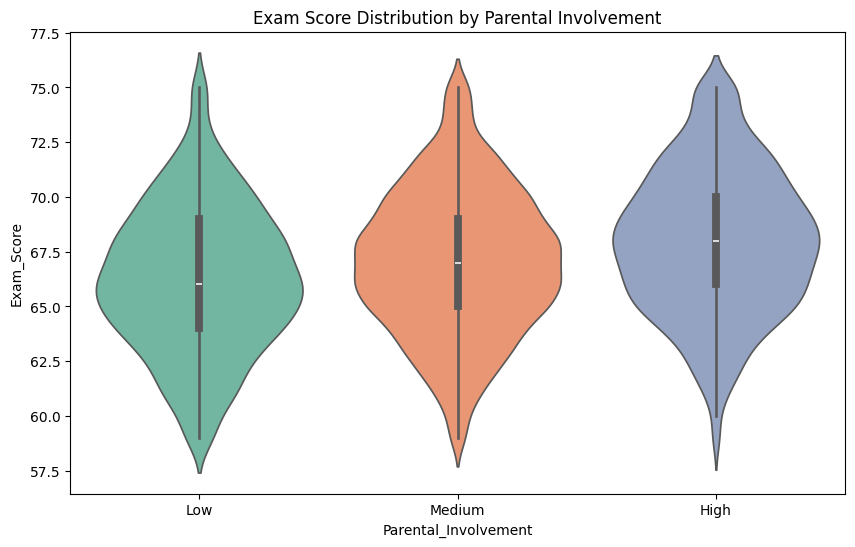

In [21]:
#  Violin Plot to Show Distribution of Exam Scores by Parental_Involvement

plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='Parental_Involvement', y='Exam_Score', palette='Set2')
plt.title('Exam Score Distribution by Parental Involvement')
plt.show()

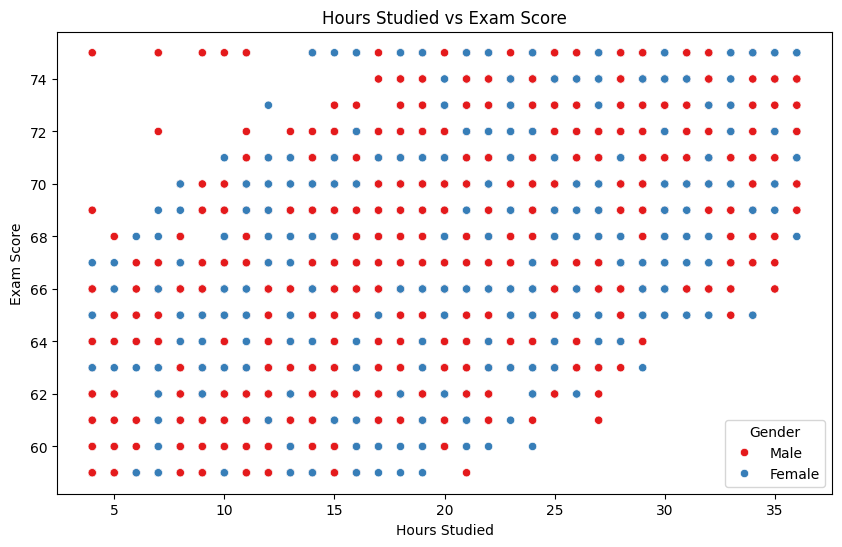

In [22]:
# Scatter Plot for Hours Studied vs Exam Score

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Hours_Studied', y='Exam_Score', hue='Gender', palette='Set1')
plt.title('Hours Studied vs Exam Score')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')
plt.show()

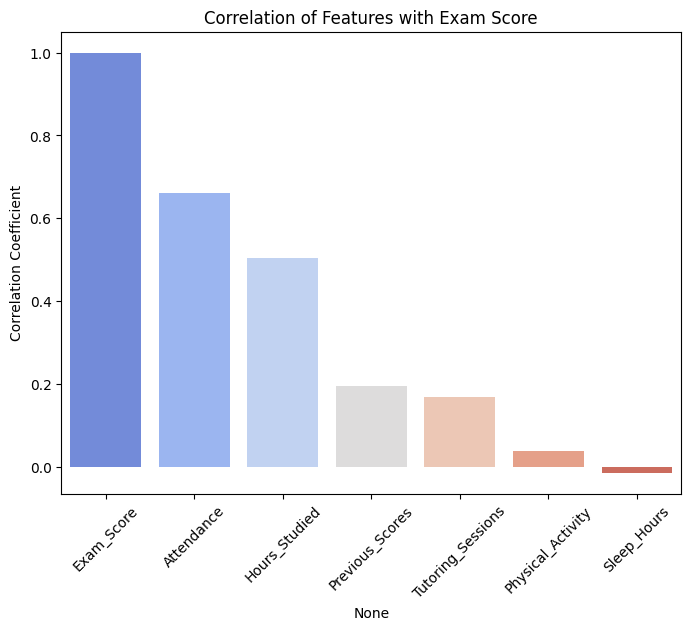

In [23]:
# correlation with Exam_Score

correlation_with_target = numerical_features.corr()['Exam_Score'].sort_values(ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')
plt.title('Correlation of Features with Exam Score')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

## One Hot Encoding

In [24]:
# Performing one-hot encoding on categorical columns to convert them into numerical format
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 
    'Motivation_Level', 'Internet_Access', 'Family_Income','Teacher_Quality', 'School_Type', 
    'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level','Distance_from_Home','Gender'
]

df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
df.sample(5)

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Teacher_Quality_Medium,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Gender_Male
6253,22.0,85.0,6.0,96.0,0.0,3.0,69.0,False,False,False,...,True,True,True,False,False,True,False,True,False,False
6157,14.0,84.0,6.0,51.0,3.5,3.0,67.0,False,False,False,...,True,True,True,False,False,True,False,False,True,True
5555,11.0,97.0,7.0,91.0,1.0,4.0,69.0,False,True,False,...,True,True,False,True,False,True,False,False,True,True
779,24.0,71.0,6.0,52.0,2.0,3.0,66.0,False,True,False,...,True,False,True,False,False,False,False,False,False,False
3477,7.0,61.0,4.0,76.0,1.0,5.0,60.0,True,False,False,...,True,False,False,True,False,True,False,False,False,False


## Train Test And Split

In [25]:
# Splitting the dataset into features (X) and target variable (y)
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']

In [26]:
# Splitting the dataset into training and testing sets with 80-20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training and Evaluation

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
# Initializing and training the Linear Regression model
lf = LinearRegression()

lf.fit(X_train, y_train)

LinearRegression()

In [29]:
# Making predictions on the test set and calculating the R2 score
lf_pred = lf.predict(X_test)
lf_r2 = r2_score(y_test, lf_pred)

print(f"R2 Score = {lf_r2}")

R2 Score = 0.9430225322310359


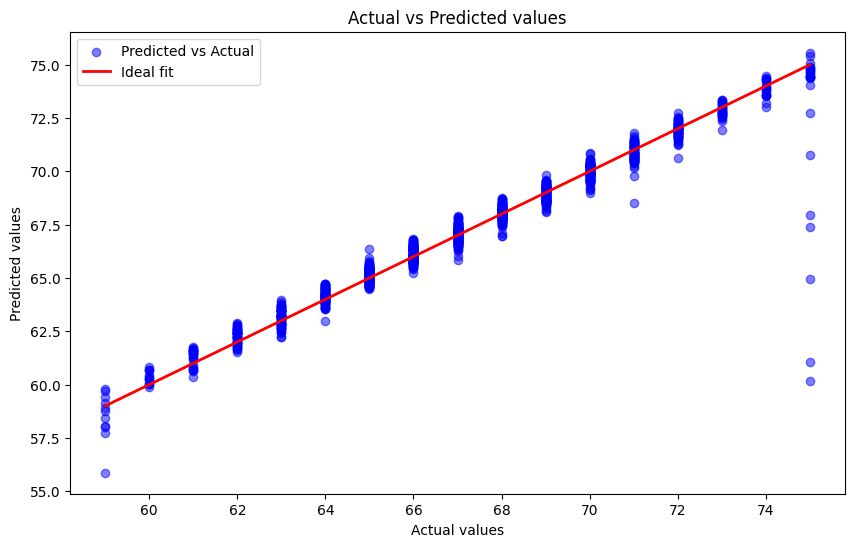

In [30]:
# Plot for Actual vs Predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_test, lf_pred, color='blue', alpha=0.5, label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Ideal fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Actual vs Predicted values')
plt.legend()
plt.show()

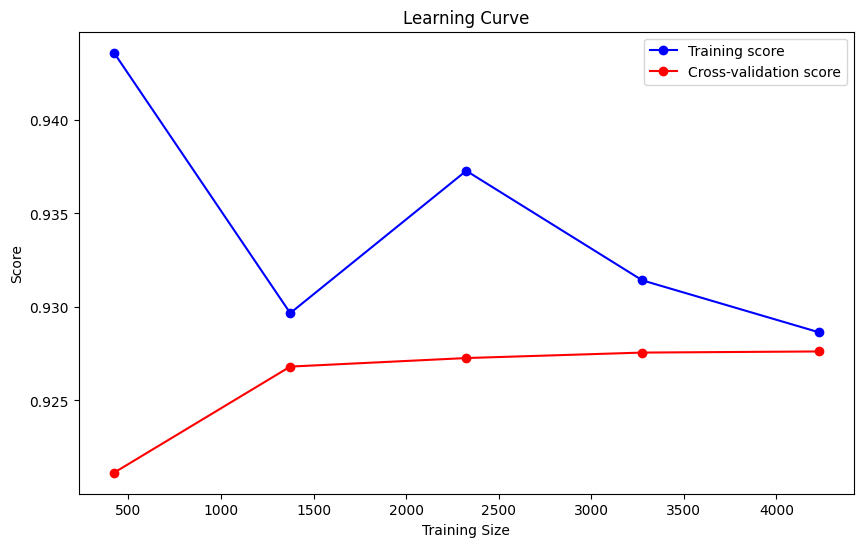

In [31]:
# Plot for learning curve

from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(lf, X_train, y_train, cv=5)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score', color='blue', marker='o')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Cross-validation score', color='red', marker='o')
plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [32]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': lf_pred})
print(comparison_df.head(10))

      Actual  Predicted
743     65.0  64.645834
5551    65.0  65.195650
3442    71.0  71.318985
6571    64.0  64.254559
4204    66.0  66.386996
2516    66.0  66.536841
4047    72.0  71.936331
1706    66.0  66.363457
1075    70.0  69.872346
233     70.0  69.891382


In [33]:
import joblib

# Save the trained model to a file
joblib.dump(lf, 'model.pkl')

print("Model saved as model.pkl")

Model saved as model.pkl
